# 📊 Stock Analysis: Relative Strength Index (RSI)

This notebook explores the **Relative Strength Index (RSI)**, a momentum oscillator that measures the speed and change of price movements. It helps assess whether a stock is **overbought** or **oversold**.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Step 1: Load Historical Data

We'll fetch 6 months of daily stock price data.


In [2]:
ticker = yf.Ticker("AAPL")
df = ticker.history(period="6mo")
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-17 00:00:00-04:00,232.917370,233.336461,230.013772,231.640182,32993800,0.0,0.0
2024-10-18 00:00:00-04:00,235.661334,235.661334,233.496101,234.483932,46431500,0.0,0.0
2024-10-21 00:00:00-04:00,233.935137,236.329876,233.935137,235.960678,36254500,0.0,0.0
2024-10-22 00:00:00-04:00,233.376366,235.701251,232.089206,235.342041,38846600,0.0,0.0
2024-10-23 00:00:00-04:00,233.565951,234.623621,227.259823,230.253235,52287000,0.0,0.0


## Step 2: Calculate the RSI

RSI is typically calculated over a 14-day period:
- RSI > 70: stock is considered **overbought**
- RSI < 30: stock is considered **oversold**


In [3]:
delta = df["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))
df[["Close", "RSI"]].tail()


,Close,RSI
Date,,
2025-04-10 00:00:00-04:00,190.419998,37.141012
2025-04-11 00:00:00-04:00,198.149994,40.058122
2025-04-14 00:00:00-04:00,202.520004,40.762342
2025-04-15 00:00:00-04:00,202.139999,41.425670
2025-04-16 00:00:00-04:00,194.270004,37.531617


## Step 3: Plot the RSI with Thresholds

We visualize the RSI and mark the overbought/oversold thresholds (70 and 30).


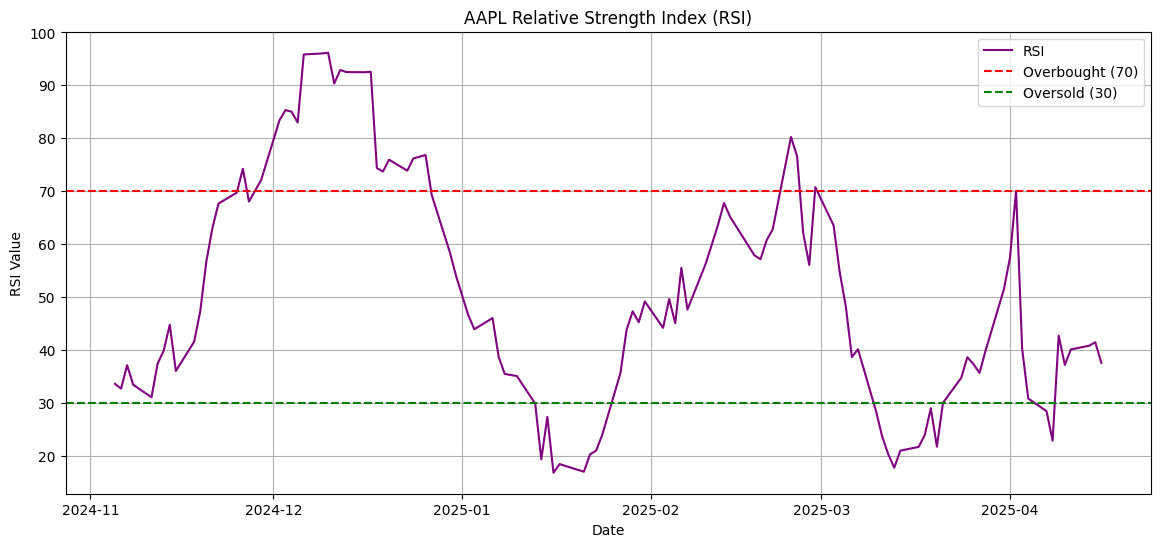

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df["RSI"], label="RSI", color="purple")
plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
plt.title("AAPL Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()


## Step 4: Interpretation

- **RSI > 70** may signal that the stock is overbought and due for a correction.
- **RSI < 30** may signal that the stock is oversold and could bounce back.
- RSI is a common tool for **timing entry and exit** points in momentum trading strategies.
